In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/carlospujades/Documents/Carletes/Myself/Zrive/Module 2/feature_frame.csv')
df.head()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


### Filtering for orders with 5 or more items

In [4]:
items_per_order = df.groupby('order_id')['outcome'].sum()
big_orders = items_per_order[items_per_order >= 5]
orders_nums = big_orders.index
df = df[df['order_id'].isin(orders_nums)]

### Optimize DataFrame for memory

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2163953 entries, 0 to 2880547
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults                      float64

In [6]:
df.drop(['order_id', 'created_at', 'order_date'], inplace=True, axis=1)

columns = ['user_order_seq', 'outcome', 'ordered_before', 'abandoned_before', 'active_snoozed', 'set_as_regular', 'count_adults', 'count_children', 'count_babies', 'count_pets', 'people_ex_baby', 'days_since_purchase_variant_id', 'days_since_purchase_product_type']
for c in columns:
    df[c] = df[c].astype('int32')
    
float_cols = ['normalised_price', 'discount_pct', 'global_popularity', 'avg_days_to_buy_variant_id', 'std_days_to_buy_variant_id', 'avg_days_to_buy_product_type', 'std_days_to_buy_product_type']
for c in float_cols:
    df[c] = df[c].astype('float32')
        
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2163953 entries, 0 to 2880547
Data columns (total 24 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   user_id                           int64  
 3   user_order_seq                    int32  
 4   outcome                           int32  
 5   ordered_before                    int32  
 6   abandoned_before                  int32  
 7   active_snoozed                    int32  
 8   set_as_regular                    int32  
 9   normalised_price                  float32
 10  discount_pct                      float32
 11  vendor                            object 
 12  global_popularity                 float32
 13  count_adults                      int32  
 14  count_children                    int32  
 15  count_babies                      int32  
 16  count_pets                        int32  

In [7]:
df.head()

,variant_id,product_type,user_id,user_order_seq,outcome,ordered_before,abandoned_before,active_snoozed,set_as_regular,normalised_price,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,3482464092292,3,0,0,0,0,0,0.081052,...,0,0,0,2,33,42.0,31.134054,30,30.0,24.27618
1,33826472919172,ricepastapulses,3466586718340,2,0,0,0,0,0,0.081052,...,0,0,0,2,33,42.0,31.134054,30,30.0,24.27618
2,33826472919172,ricepastapulses,3481384026244,4,0,0,0,0,0,0.081052,...,0,0,0,2,33,42.0,31.134054,30,30.0,24.27618
3,33826472919172,ricepastapulses,3291363377284,2,0,0,0,0,0,0.081052,...,0,0,0,2,33,42.0,31.134054,30,30.0,24.27618
5,33826472919172,ricepastapulses,3479090790532,3,0,0,0,0,0,0.081052,...,0,0,0,2,33,42.0,31.134054,30,30.0,24.27618


### Training the model

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier

In [9]:
df['outcome'].value_counts()

outcome
0    2132624
1      31329
Name: count, dtype: int64

In [10]:
X = df.drop('outcome', axis=1)
y = df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.4, random_state=9)

In [11]:
cat_cols = ['product_type', 'vendor']
for c in cat_cols:
    train_freq = X_train[c].value_counts()
    X_train[c] = X_train[c].map(train_freq)
    
    test_freq = X_test[c].value_counts()
    X_test[c] = X_test[c].map(test_freq)

In [12]:
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE


sgd_log = SGDClassifier(loss='log_loss',class_weight='balanced')
sgd_svm = SGDClassifier(loss='hinge', class_weight='balanced')
ridge = RidgeClassifier(class_weight='balanced')
log_reg = LogisticRegression(class_weight='balanced')

oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train_scaled, y_train)



models = [('SGD LOG', sgd_log),
          ('SGD SVM', sgd_svm),
          ('Ridge', ridge),
          ('Logistic Regression', log_reg)]

accuracy = []
precision = []
recall = []
names = []


for name, model in models:
    scores = cross_validate(model, X_smote, y_smote, cv=10, scoring=['accuracy', 'precision', 'recall'])
    accuracy.append(scores['test_accuracy'].mean())
    precision.append(scores['test_precision'].mean())
    recall.append(scores['test_recall'].mean())
    names.append(name)


results = pd.DataFrame({'Model': names, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})

results

,Model,Accuracy,Precision,Recall
0,SGD LOG,0.739644,0.800940,0.637845
1,SGD SVM,0.736903,0.807866,0.621708
2,Ridge,0.712254,0.804072,0.561273
3,Logistic Regression,0.739791,0.800841,0.638327


</p>As whe have class imbalance, we use `class_weight='balance'` and oversample to increase the number of samples in the underrepresented class.</p>
<p>Based on the previous cells, we stick with Logistic Regression that has a higher score across accuracy, precision and recall. Although, due to the class imbalance the metric we are most interested in is recall.</p>
<p>Let's now fine-tune its hyperparameters.</p>

### Final model

In [14]:
from sklearn.metrics import confusion_matrix

params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
    }

log_reg = LogisticRegression(class_weight='balanced')

grid = GridSearchCV(log_reg, cv=10, param_grid=params, n_jobs=-1, refit=True, scoring='precision')
grid.fit(X_smote, y_smote) 
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)
y_pred = grid.predict(X_test_scaled)
y_probs = grid.predict_proba(X_test_scaled)[:,1]
y_log_probs = grid.predict_log_proba(X_test_scaled)[:,1]
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

{'C': 0.001}
0.800954386060868
LogisticRegression(C=0.001, class_weight='balanced')
              precision    recall  f1-score   support

           0       0.99      0.85      0.91    853050
           1       0.06      0.64      0.11     12532

    accuracy                           0.84    865582
   macro avg       0.53      0.74      0.51    865582
weighted avg       0.98      0.84      0.90    865582

[[723026 130024]
 [  4529   8003]]


### ROC Curve

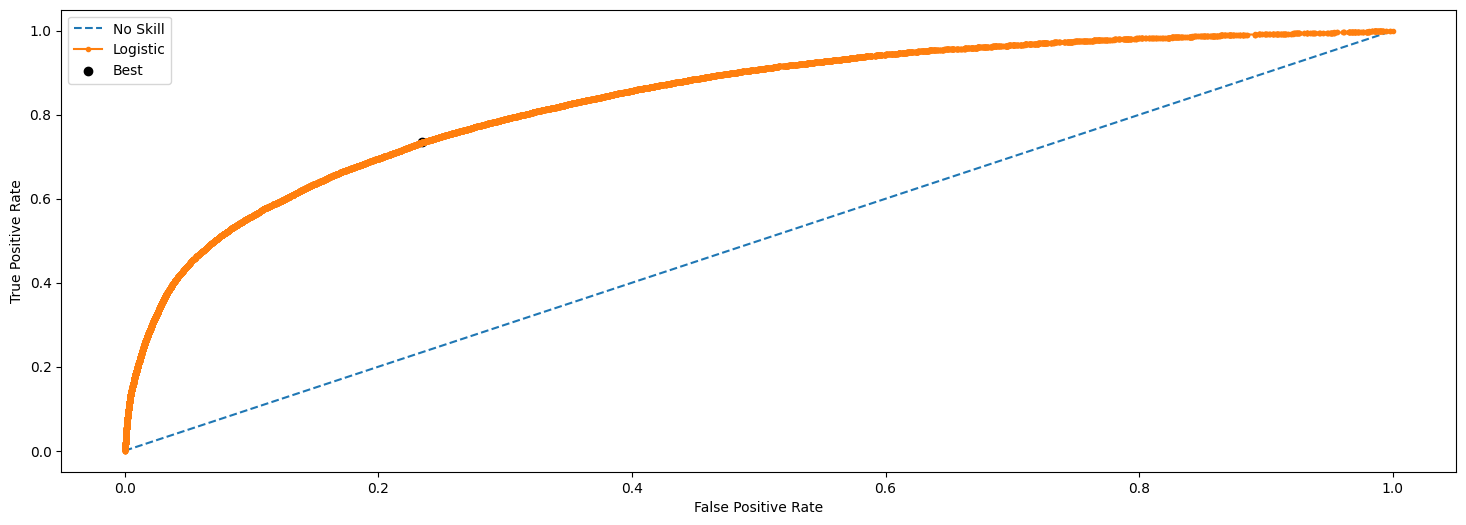

Best Threshold=0.415834, G-Mean=0.750


In [15]:
from sklearn.metrics import roc_curve
from numpy import sqrt
from numpy import argmax

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

gmeans = sqrt(tpr * (1-fpr))
ix = argmax(gmeans)

plt.figure(figsize=(18, 6))
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=1.000000, F-Score=nan


/var/folders/89/kh4sf6hs6xngc9mwq6wfcb_r0000gn/T/ipykernel_39509/926414922.py:6: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision * recall) / (precision + recall)


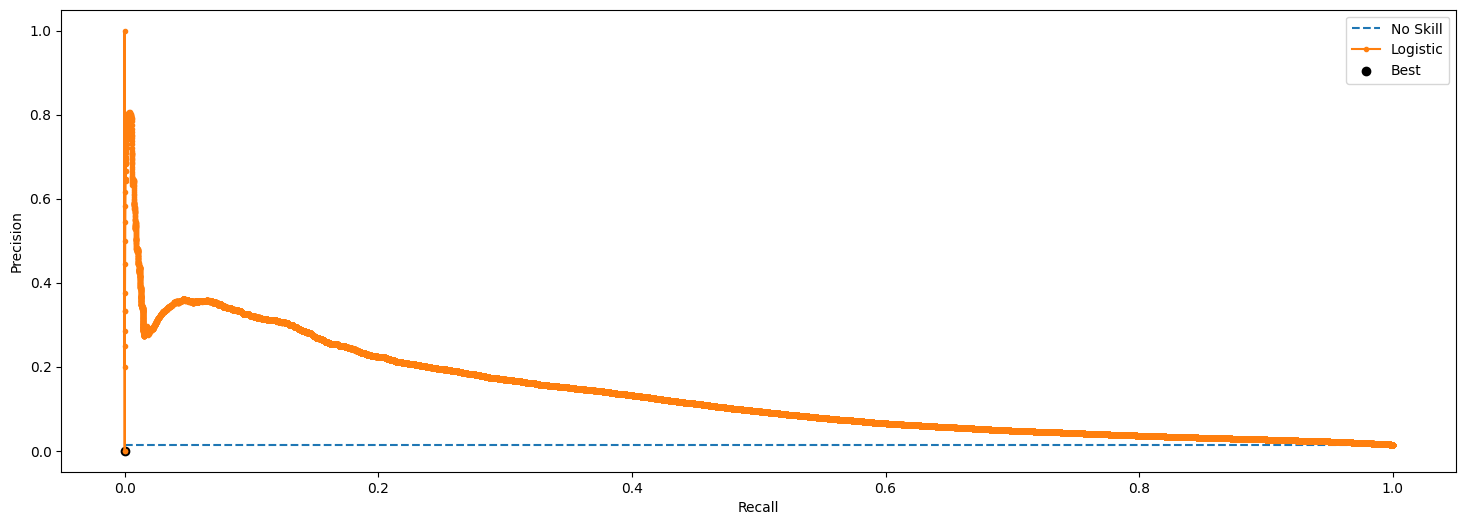

In [16]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
no_skill = len(y_test[y_test==1]) / len(y_test)

fscore = (2 * precision * recall) / (precision + recall)
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

plt.figure(figsize=(18, 6))
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred)
print('F-Score: %.5f' % score)

F-Score: 0.10631


In [18]:
from numpy import arange

def to_labels(pos_probs, threshold):
 return (pos_probs >= threshold).astype('int')

thresholds = arange(0, 1, 0.001)
scores = [f1_score(y_test, to_labels(y_probs, t)) for t in thresholds]
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))


Threshold=0.914, F-Score=0.21954


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

print("Evaluation metrics with threshold 0.5:") 
print("Accuracy:", accuracy_score(y_test, y_pred)) 
print("Precision:", precision_score(y_test, y_pred)) 
print("Recall:", recall_score(y_test, y_pred)) 
print("F1 score:", f1_score(y_test, y_pred))

Evaluation metrics with threshold 0.5:
Accuracy: 0.8445519892973745
Precision: 0.057981409434386025
Recall: 0.6386051707628471
F1 score: 0.10631048293360078


In [24]:
y_pred_new_threshold = (y_probs >= thresholds[ix]).astype(int) 
print(f"Evaluation metrics with threshold {thresholds[ix]}:") 
print("Accuracy:", accuracy_score(y_test, y_pred_new_threshold)) 
print("Precision:", precision_score(y_test, y_pred_new_threshold)) 
print("Recall:", recall_score(y_test, y_pred_new_threshold)) 
print("F1 score:", f1_score(y_test, y_pred_new_threshold))
print(confusion_matrix(y_test, y_pred_new_threshold))

Evaluation metrics with threshold 0.914:
Accuracy: 0.9729430602762072
Precision: 0.18848706797894255
Recall: 0.26284711139482925
F1 score: 0.21954145561183686
[[838868  14182]
 [  9238   3294]]


### Creating the pipeline

In [21]:
#Read csv
df = pd.read_csv('/Users/carlospujades/Documents/Carletes/Myself/Zrive/Module 2/feature_frame.csv')

#Filter orders with more than 5 items
items_per_order = df.groupby('order_id')['outcome'].sum()
big_orders = items_per_order[items_per_order >= 5]
orders_nums = big_orders.index
df = df[df['order_id'].isin(orders_nums)]

#Drop columns and change data types for efficiency
df.drop(['order_id', 'created_at', 'order_date'], inplace=True, axis=1)

columns = ['user_order_seq', 'outcome', 'ordered_before', 'abandoned_before', 'active_snoozed', 'set_as_regular', 'count_adults', 'count_children', 'count_babies', 'count_pets', 'people_ex_baby', 'days_since_purchase_variant_id', 'days_since_purchase_product_type']
for c in columns:
    df[c] = df[c].astype('int32')
    
float_cols = ['normalised_price', 'discount_pct', 'global_popularity', 'avg_days_to_buy_variant_id', 'std_days_to_buy_variant_id', 'avg_days_to_buy_product_type', 'std_days_to_buy_product_type']
for c in float_cols:
    df[c] = df[c].astype('float32')

In [22]:
#Train-test split
X = df.drop('outcome', axis=1)
y = df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.4, random_state=9)

#Frequency encoding for categorical columns
cat_cols = ['product_type', 'vendor']
for c in cat_cols:
    train_freq = X_train[c].value_counts()
    X_train[c] = X_train[c].map(train_freq)
    
    test_freq = X_test[c].value_counts()
    X_test[c] = X_test[c].map(test_freq)

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score

oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

pipeline = Pipeline(
    [('scaler', StandardScaler()),
     ('log_reg', LogisticRegression(C=0.001))])

pipeline.fit(X_smote, y_smote)
predictions = pipeline.predict(X_test)
probabilities = pipeline.predict_proba(X_test)[:,1]
new_preds = (probabilities >= thresholds[ix]).astype(int)


print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("Confusion matrix:", confusion_matrix(y_test, predictions))



print("Accuracy:", accuracy_score(y_test, new_preds))
print("Precision:", precision_score(y_test, new_preds))
print("Recall:", recall_score(y_test, new_preds))
print("Confusion matrix:", confusion_matrix(y_test, new_preds))

Accuracy: 0.8009408698424875
Precision: 0.048667216578718406
Recall: 0.6873603574848388
Confusion matrix: [[684666 168384]
 [  3918   8614]]
Accuracy: 0.8671321723418463
Precision: 0.06306175703102349
Recall: 0.5900893712097032
Confusion matrix: [[743179 109871]
 [  5137   7395]]
